<div style="background-color:white; color:black; padding:10px; width:100%;">
  <table style="width:100%; border:none;">
    <tr style="border:none;">
      <td style="text-align:left; border:none; vertical-align:middle;">
        <a href="https://dswa.vercel.app/" target="_blank">
          <img src="images/logo.svg" alt="Logo" style="height:120px;">
        </a>
      </td>
      <td style="text-align:right; border:none; vertical-align:middle;">
        <h2 style="margin:0; font-size:80px;">
          <strong href="https://dswa.vercel.app/" target="_blank" style="text-decoration:none; color:black; padding-right:40px;">
            DSWA
          </strong>
        </h2>
      </td>
    </tr>
  </table>
</div>

# Segmentação de Clientes com K-Means

**Tópico:** Aprendizado Não Supervisionado - Análise de Cluster

**Dataset:** [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)

### **Objetivo da Competição**

Bem-vindo(a)!

Neste notebook, vamos explorar o mundo do **Aprendizado Não Supervisionado**. Diferente do aprendizado supervisionado (onde temos um "gabarito" ou uma variável alvo, como "vendeu" ou "não vendeu"), aqui o objetivo é encontrar padrões e estruturas escondidas nos dados por conta própria.

Usaremos uma das técnicas mais famosas para isso: o **K-Means Clustering**. Nossa missão será agrupar clientes de um shopping com base em seus perfis de compra, criando "segmentos" ou "personas".

**A sua tarefa** será analisar esses segmentos e extrair insights de negócio a partir deles. Vamos começar!

### **Passo 1: Preparação do Ambiente**

Primeiro, vamos importar as bibliotecas que nos ajudarão nesta jornada.

-   **pandas:** para carregar e manipular nossos dados.
-   **numpy:** para operações numéricas.
-   **matplotlib & seaborn:** para criar visualizações incríveis.
-   **scikit-learn:** para usar o algoritmo K-Means.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### **Passo 2: Carregando e Explorando os Dados (EDA - Exploratory Data Analysis)**

Vamos usar o dataset "Mall Customer Segmentation" do Kaggle. Ele contém informações básicas sobre os clientes de um shopping.

**Colunas do Dataset:**
*   **CustomerID:** ID único para cada cliente.
*   **Gender:** Gênero do cliente.
*   **Age:** Idade do cliente.
*   **Annual Income (k$):** Renda anual do cliente em milhares de dólares.
*   **Spending Score (1-100):** Uma pontuação de 1 a 100 atribuída pelo shopping com base no comportamento de gastos do cliente.

In [ ]:
from io import StringIO

# Carregando o dataset
df = pd.read_csv('Mall_Customers.csv')

# Vamos dar uma primeira olhada nos dados
print("As 5 primeiras linhas do nosso dataset:")
display(df.head())

print("\nInformações gerais sobre as colunas:")
df.info()

print("\nVerificando se há valores nulos:")
print(df.isnull().sum())

As 5 primeiras linhas do nosso dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Informações gerais sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Verificando se há valores nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Primeiras Impressões:**
*   Temos 200 registros (clientes).
*   As colunas estão com os tipos de dados corretos.
*   Ótima notícia: não temos valores nulos! Isso facilita nosso trabalho.

### **Passo 3: Visualizando os Dados**

A melhor forma de entender os dados é visualizando-os. Vamos criar alguns gráficos para encontrar padrões.

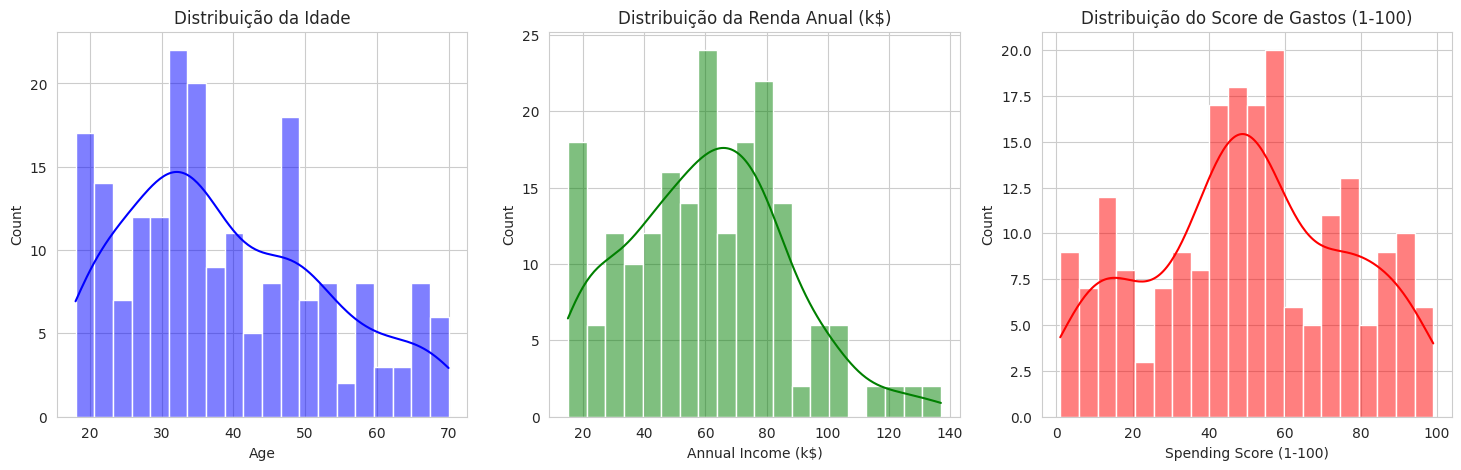

In [ ]:
# Distribuição da Idade, Renda Anual e Score de Gastos
plt.figure(1, figsize=(18, 5))

# Gráfico da Idade
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição da Idade')

# Gráfico da Renda Anual
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribuição da Renda Anual (k$)')

# Gráfico do Score de Gastos
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribuição do Score de Gastos (1-100)')

plt.show()

**Análise dos Gráficos de Distribuição:**
*   **Idade:** A maior concentração de clientes está entre 20 e 40 anos.
*   **Renda Anual:** A maioria dos clientes tem uma renda entre 40k e 80k dólares.
*   **Score de Gastos:** A pontuação de gastos é mais concentrada no meio, entre 40 e 60.

Agora, vamos focar no que mais nos interessa: a relação entre **renda** e **score de gastos**. Um gráfico de dispersão (scatter plot) é perfeito para isso.

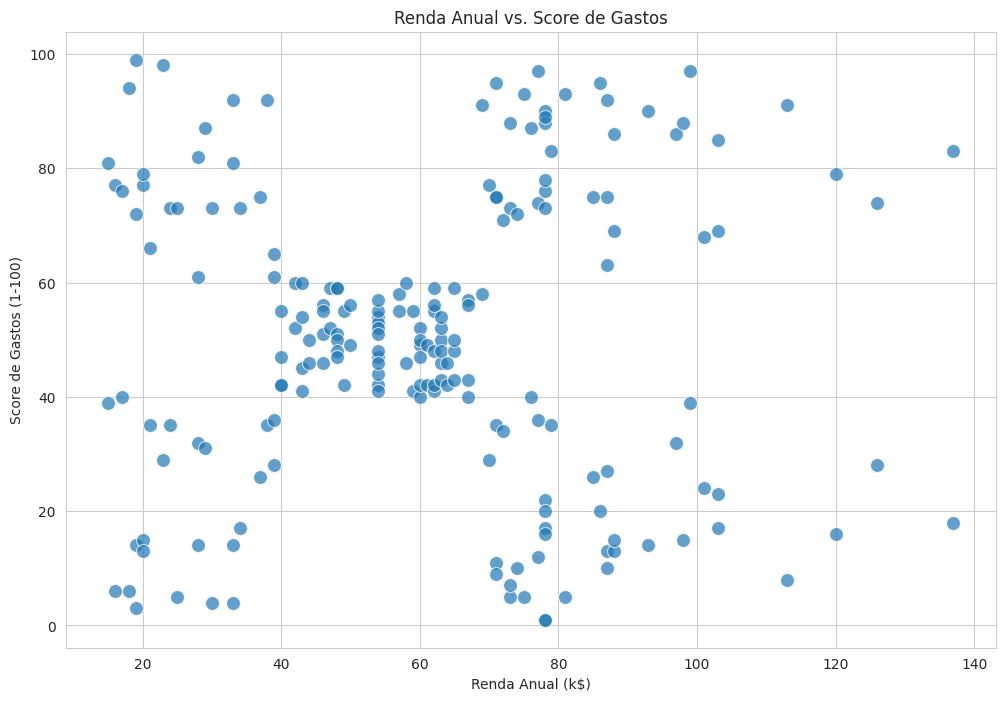

In [ ]:
# Gráfico de Dispersão: Renda Anual vs. Score de Gastos
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Renda Anual vs. Score de Gastos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

**Observação Importante:**
Olhando para o gráfico acima, você consegue ver "grupos" ou "aglomerados" de pontos? Parece que existem cerca de 5 grupos distintos de clientes. É exatamente isso que o algoritmo K-Means vai tentar formalizar para nós!

### **Passo 4: Preparando os Dados e Encontrando o Número Ideal de Clusters**

O K-Means precisa saber quantos clusters (o "K" do nome) ele deve criar. Podemos usar uma técnica chamada **Método do Cotovelo (Elbow Method)** para nos ajudar a decidir.

A ideia é rodar o K-Means para vários valores de K (de 1 a 10, por exemplo) e medir a "inércia" de cada um. A inércia é a soma das distâncias quadradas de cada ponto ao centro do seu cluster. Queremos uma inércia baixa.

O "cotovelo" no gráfico é o ponto onde a inércia para de diminuir drasticamente. Esse é um bom indicativo do número ideal de clusters.

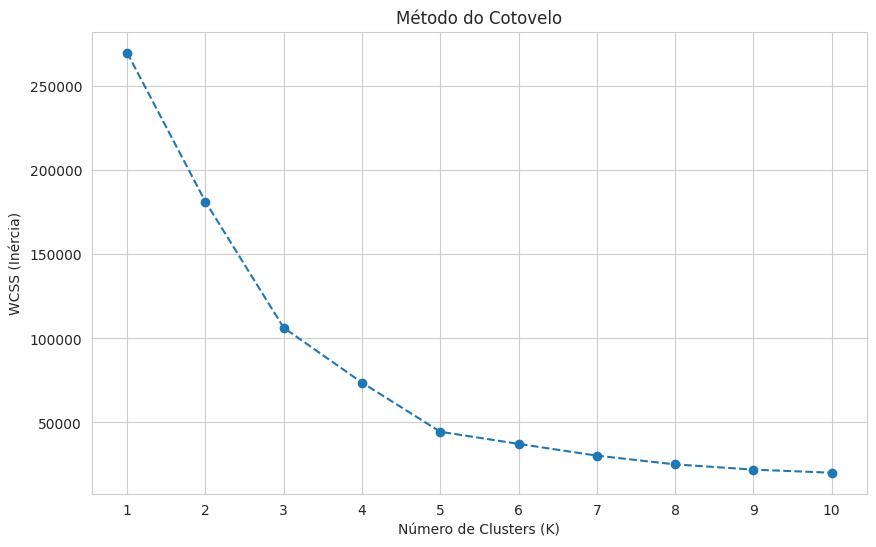

In [ ]:
# Vamos focar nas duas variáveis que visualizamos: Renda e Score.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Lista para armazenar a inércia (WCSS - Within-Cluster Sum of Squares)
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 11))
plt.show()

**Análise do Gráfico do Cotovelo:**
O "cotovelo" da curva é claramente no ponto **K=5**. A partir daí, a redução na inércia se torna muito menor. Portanto, 5 é o número ideal de clusters para nossos dados. Nossa intuição visual estava certa!

### **Passo 5: Aplicando o K-Means e Visualizando os Segmentos**

Agora que sabemos o número mágico (K=5), vamos aplicar o algoritmo e ver os resultados.

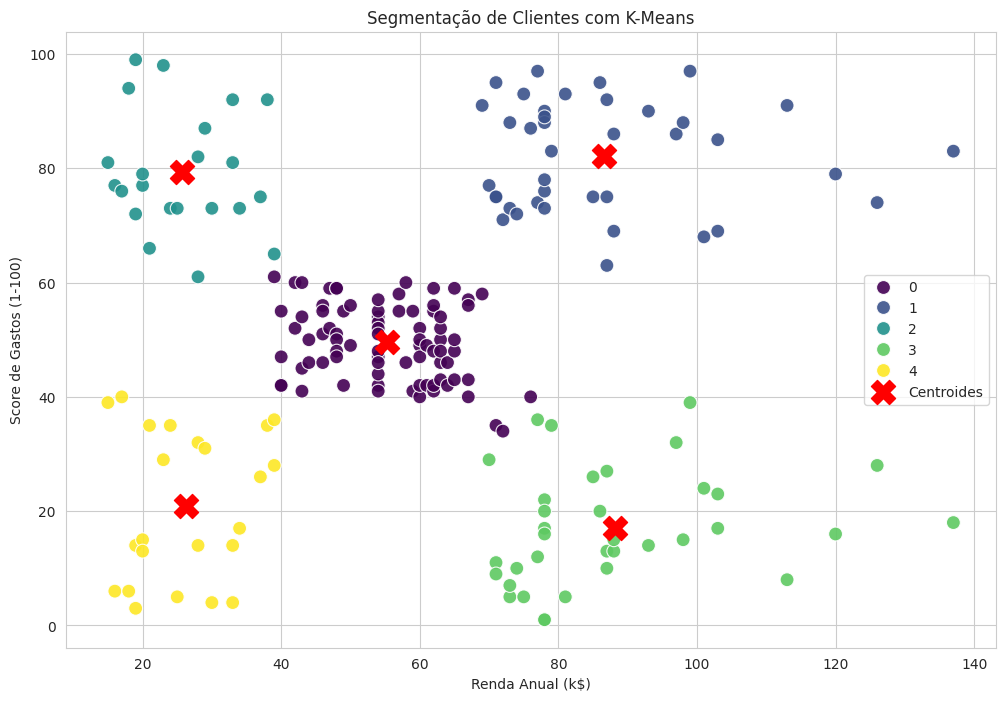

In [ ]:
# Criando e treinando o modelo K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Adicionando a coluna de 'Cluster' ao nosso DataFrame original
df['Cluster'] = y_kmeans

# Visualizando os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.9)

# Plotando os centroides (o "coração" de cada cluster)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentação de Clientes com K-Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend()
plt.show()

**Sucesso!** O algoritmo K-Means separou nossos clientes em 5 grupos distintos e visualmente coerentes. Agora vem a parte mais importante: entender o que cada grupo significa.

---

## **SUA VEZ**

Agora que os clusters foram criados, sua tarefa é se tornar um(a) analista de dados e transformar esses grupos em insights de negócio valiosos.

### **Tarefa 1: Análise e Interpretação dos Clusters**

Para cada um dos 5 clusters, você deve descrever o perfil dos clientes que pertencem a ele. Uma ótima maneira de começar é calculando a média das características para cada grupo.

**Dica:** Use o método `.groupby()` do pandas.

**Responda às seguintes perguntas (no seu relatório ou em uma célula de texto abaixo):**

1.  **Crie um "apelido" ou "persona" para cada cluster.** Por exemplo: "Econômicos", "Gastadores", "Público Alvo", "Pão-duro", etc. Justifique sua escolha com base nos dados.
2.  **Descreva em detalhes o perfil de cada cluster.**
    *   **Cluster 0:** Qual é a principal característica deste grupo? (Ex: Renda alta, Score baixo)
    *   **Cluster 1:** ...
    *   **Cluster 2:** ...
    *   **Cluster 3:** ...
    *   **Cluster 4:** ...
3.  **Qual cluster você considera o mais valioso para o shopping? E o menos valioso?** Por quê?

In [ ]:
df['Cluster'] = kmeans.labels_

analise_grupos = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

contagem_grupos = df.groupby('Cluster')['CustomerID'].count()

print("--- Média de cada atributo por Cluster ---")
display(analise_grupos)

print("\n--- Quantidade de Clientes por Cluster ---")
display(contagem_grupos)

--- Média de cada atributo por Cluster ---


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043



--- Quantidade de Clientes por Cluster ---


,CustomerID
Cluster,
0,81
1,39
2,22
3,35
4,23


Cluster 0(Cliente médio):

-Perfil: Cliente com renda anual média(55k) e score de gastos médio(50), cluster com 40% do número total de clientes, sendo muito relevante para as vendas no shopping, consumo equilibrado.

Cluster 1(Cliente alto padrão):

-Perfil: Cliente com alta renda anual(86k) e possui o maior score de gasto(82), cluster com 20% do número total de clientes, sendo o público mais valioso, provavelmente gastam sem se preocupar com o preço.

Cluster  2(Cliente gastadores):

-Perfil: Cliente com menor renda anual(25k) e alto score de gasto(79), menir dos 5 clusters que ocupa cerca de 10% do número total de clientes, gastam tudo o que podem no shopping, provavelmente são impulsivos.

Cluster 3(Cliente alto padrão exigente):

-Perfil: Cliente com maior renda anual(88k) e menor score de gasto(17), cluster que ocupa quase 20% do total de clientes, público que deve ser o foco para se aumentar as vendas, pois são muitos e tem dinheiro para gastar, podem ser ecônomicos ou preferem gastar em outras coisas.

Cluster 4(Cliente baixo padrão pão duro):

-Perfil: Cliente com baixa renda anual(26k) e baixo score de gasto(20), cluster com cerca de 10% do público total, difícil de se agradar e aumentar as vendas, gastam somente quando necessário, menos valiosos.

### **Tarefa 2: Desafio - Incluindo a Idade na Análise**

Nosso modelo usou apenas Renda e Score de Gastos. O que acontece se incluirmos a **Idade** na clusterização?

1.  **Repita o processo de clusterização (Passos 4 e 5)**, mas desta vez usando as colunas `Age`, `Annual Income (k$)` e `Spending Score (1-100)`.
2.  Você pode manter K=5 ou usar o Método do Cotovelo novamente para ver se um número diferente de clusters seria melhor com 3 variáveis.
3.  **Analise os novos clusters.** Eles são parecidos com os que você encontrou na Tarefa 1? A idade parece ser um fator importante para separar os grupos?
4.  **Atenção:** Você não poderá mais usar um gráfico de dispersão 2D para visualizar os clusters, pois agora temos 3 dimensões. A análise terá que ser feita principalmente com base nos valores médios de cada cluster (como no `groupby` da Tarefa 1).

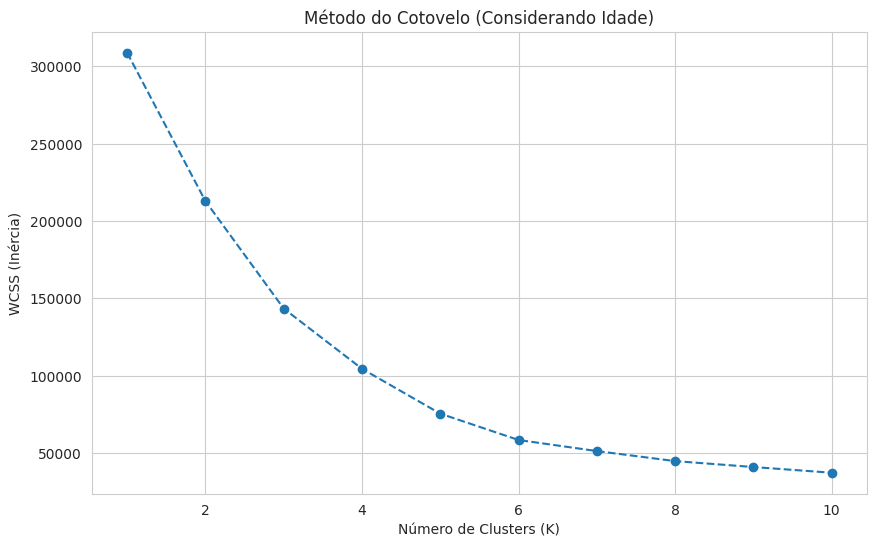

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Considerando Idade)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.grid(True)
plt.show()

In [ ]:
df['Cluster'] = kmeans.labels_

analise_completa = df.groupby('Cluster')[
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
].mean()

contagem = df.groupby('Cluster')['CustomerID'].count()

print("--- 📊 PERFIL MÉDIO DOS CLUSTERS (Com Idade) ---")
display(analise_completa)

print("\n--- 👥 TAMANHO DOS GRUPOS ---")
display(contagem)

--- 📊 PERFIL MÉDIO DOS CLUSTERS (Com Idade) ---


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.155556,53.377778,49.088889
1,41.685714,88.228571,17.285714
2,25.272727,25.727273,79.363636
3,27.000000,56.657895,49.131579
4,32.692308,86.538462,82.128205
5,44.142857,25.142857,19.523810



--- 👥 TAMANHO DOS GRUPOS ---


,CustomerID
Cluster,
0,45
1,35
2,22
3,38
4,39
5,21


Ao rodar o método do cotovelo novamente percebe-se que a melhor divisão seria de 6 clusters, eles são relativamente parecidos com os anteriores porém percebe-se outros padrões, os que mais gastam costumam ser jovens, enquanto os mais velhos são mais econômicos, assim pode-se fazer uma descrição mais precisa dos perfis dos clientes.

### **Tarefa 3: Conclusões e Recomendações de Negócio**

Com base na sua análise da **Tarefa 1**, escreva um parágrafo final com recomendações para a equipe de marketing do shopping.

*   Que tipo de campanha de marketing você criaria para o cluster dos "clientes com alta renda e alto score de gastos"?
*   E para o grupo de "baixa renda e alto score de gastos"?
*   Como o shopping poderia tentar engajar o grupo de "alta renda e baixo score de gastos" para que eles gastem mais?

Para o cluster de "Alta Renda e Alto Score", a estratégia deve focar inteiramente na exclusividade e na experiência do cliente, fugindo da guerra de preços. Como este público valoriza status e conforto, o ideal é criar programas de fidelidade Premium que ofereçam benefícios tangíveis, como estacionamento VIP gratuito, acesso a lounges exclusivos e convites para pré-lançamentos de marcas de luxo. A comunicação deve ser personalizada e elegante, reforçando que o shopping não é apenas um local de compras, mas um ambiente sofisticado que complementa o estilo de vida deles.

Em contrapartida, para o grupo de "Baixa Renda e Alto Score", o foco deve ser o volume e a urgência, aproveitando o comportamento impulsivo e sensível a tendências deste perfil. As campanhas de marketing devem utilizar gatilhos mentais de escassez e oportunidade, como "Liquidações Relâmpago", cupons de desconto via aplicativo e forte apelo visual nas redes sociais. A ideia é manter a alta frequência de visitas oferecendo recompensas imediatas e destacando lojas de fast fashion e acessórios, onde o ticket médio é menor, mas a satisfação da compra é instantânea.

Por fim, para engajar os clientes de "Alta Renda e Baixo Score", o shopping precisa mudar a abordagem de "venda de produtos" para "oferta de experiências", pois este grupo é racional e não vê valor no consumo por impulso. A estratégia deve ser atraí-los através de serviços de alta qualidade, como gastronomia requintada, cinemas premium, eventos culturais ou feiras de tecnologia. Uma vez que esses clientes estejam dentro do shopping por motivos de lazer ou conveniência, a exposição a lojas de nicho e qualidade superior pode converter a visita em compras planejadas de maior valor agregado.

---

**Formato de Entrega:**
Entregue este notebook com todas as células executadas e suas respostas para as Tarefas 1, 2 e 3 preenchidas em células de texto (Markdown) e código.

**Boa sorte e boa análise!**